# Support Vector Machines - SVM
## Laboratorio 3

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="wine.jpg">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos


        


**NOTA:  Al usar SVC, anteriormente hemos dejado el modelo en blanco, (e.g. sin parámeteros).  Sin embargo, en estos datos las clases no están balanceadas.  Para intentar remediar este problema, podemos ajustar automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos con una llamada en la invocación de SVC().  Ver la [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) en-línea y averiguen cuál es el argumento\parámetro.**

In [73]:
# Librerias
import pandas as pd
import numpy as np
from sklearn import *
from scipy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Lectura CSV
wineCSV = pd.read_csv('wine_fraud.csv')

# head del archivo
wineCSV.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


Text(0.5, 1.0, 'Calidad del vino')

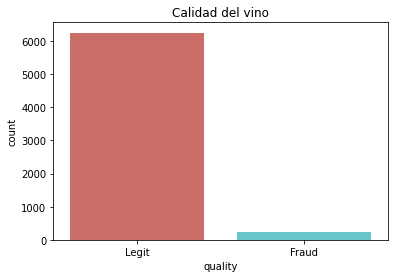

In [75]:
# Gráficos exploratorios
calidadVino =sns.countplot(x='quality', data=wineCSV, palette='hls', order=wineCSV['quality'].value_counts().index)
calidadVino.set_title('Calidad del vino')


Text(0.5, 1.0, 'Distribución de pH en el vino')

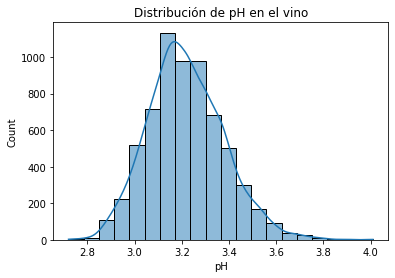

In [76]:
# Gráficos exploratorios
pH_Vino =sns.histplot(wineCSV["pH"], kde=True, bins=20)
pH_Vino.set_title("Distribución de pH en el vino")

Text(0.5, 1.0, 'Distribution de contenido alcoholico en el vino')

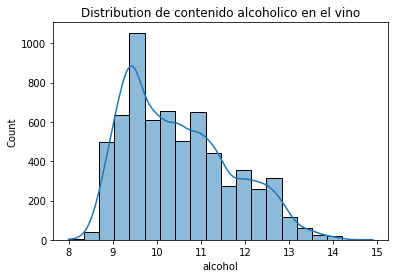

In [77]:
# Gráficos exploratorios

alcohol =sns.histplot(wineCSV["alcohol"], kde=True, bins=20)
alcohol.set_title("Distribution de contenido alcoholico en el vino")

Text(0.5, 1.0, 'Tipo de vino')

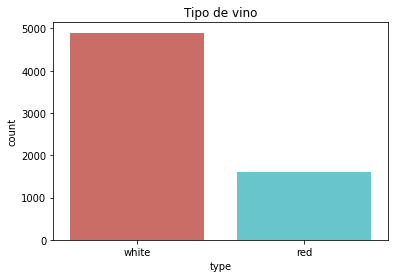

In [78]:
# Gráficos exploratorios
tipoVino =sns.countplot(x='type', data=wineCSV, palette='hls', order=wineCSV['type'].value_counts().index)
tipoVino.set_title('Tipo de vino')

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

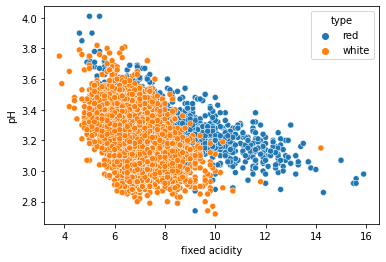

In [79]:
# Gráficos exploratorios

sns.scatterplot(x="fixed acidity", y="pH", hue="type", data=wineCSV)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

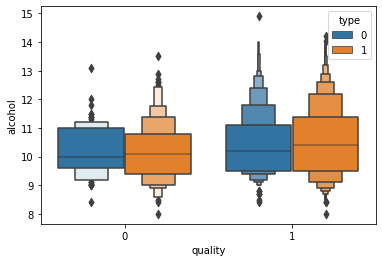

In [85]:
# Gráfico exploratorio
sns.boxenplot(x="quality", y="alcohol", hue="type", data=wineCSV)

In [80]:
# Correlación entre variables

correlacion = wineCSV.corr()
wineCSV.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


<AxesSubplot:>

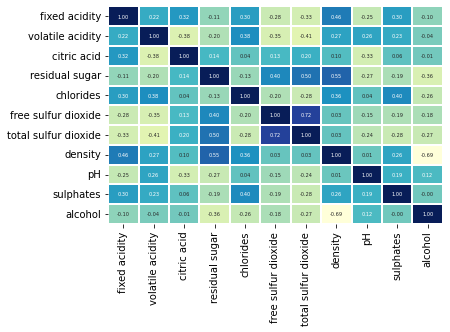

In [81]:
sns.heatmap(correlacion, annot=True, cmap="YlGnBu", linewidths=2, annot_kws={'size':5}, fmt='.2f', cbar=False)

In [82]:
# Tipos de datos en columnas
intConteo = 0
stringConteo = 0
floatConteo = 0
for i in wineCSV.columns:
    if wineCSV[i].dtype == 'int64':
        intConteo += 1
    if wineCSV[i].dtype == 'object':
        stringConteo += 1
    if wineCSV[i].dtype == 'float64':
        floatConteo += 1
        
print('Cantidad de variables tipo int: ', intConteo)
print('Cantidad de variables tipo string: ', stringConteo)
print('Cantidad de variables tipo float: ', floatConteo)
print('\nTotal de variables clasificadas: ', intConteo + stringConteo + floatConteo)
print("Total columnas en dataset:" , wineCSV.shape[1])

Cantidad de variables tipo int:  0
Cantidad de variables tipo string:  2
Cantidad de variables tipo float:  11

Total de variables clasificadas:  13
Total columnas en dataset: 13


In [83]:
# Hacer encoding para quality
encoder = preprocessing.LabelEncoder()
wineCSV['quality'] = encoder.fit_transform(wineCSV['quality'])

In [84]:
# Hacer encoding para type
encoder = preprocessing.LabelEncoder()
wineCSV['type'] = encoder.fit_transform(wineCSV['type'])

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento

**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora